In [1]:
.L ../libAmBe.so

In [2]:
test

(const int) 11


In [3]:
char const* path {"../dataset/AmBe_x1-y1_Run_99.root"};
DataSetHolder dataset = ambeDataSet(path);

In [4]:
ROOT::RDF::RNode df = dataset.df.Define("chainMaskT9", "decayChainMask(T9.parentid, T9.trackid, T9.pdg, T9.CreatorProcessID, T9.initialEkin)");
df = createT5Mask(df);
double CountAll = df.Count().GetValue();

In [5]:
df = df.Define("volidCE", "volidEpvtTot(volid[chainMaskT5 == maskCE_ELECT || chainMaskT5 == maskCE_CHILD], edep_pvt[chainMaskT5 == maskCE_ELECT || chainMaskT5 == maskCE_CHILD])");
df = df.Define("edep_pvtCE", "std::get<1>(volidCE)");
df = df.Redefine("volidCE", "std::get<0>(volidCE)");

In [6]:
df = df.Define("edep_pvtCECut", "edep_pvtCE[edep_pvtCE < 4.2 && edep_pvtCE > 0.1]");
df = df.Define("volidCECut", "volidCE[edep_pvtCE < 4.2 && edep_pvtCE > 0.1]");

# Energy distribution

In [7]:
ROOT::RDF::RNode dfedist = df.Define("CETotalEnergy", "ROOT::VecOps::Sum(edep_pvtCECut)");

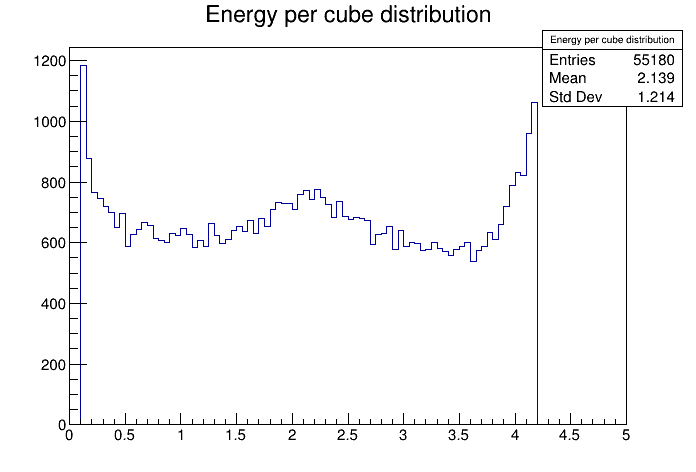

Info in <TCanvas::Print>: pdf file ../plots/pdf/ComptonEdgeEnergy.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/ComptonEdgeEnergy.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/ComptonEdgeEnergy.png has been created


In [8]:
TCanvas c;
auto hist = dfedist.Histo1D(
    {"Energy per cube distribution", "Energy per cube distribution", 100u, 0., 5.},
    "edep_pvtCECut"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"ComptonEdgeEnergy"};
savePlot(hist, dir, file);

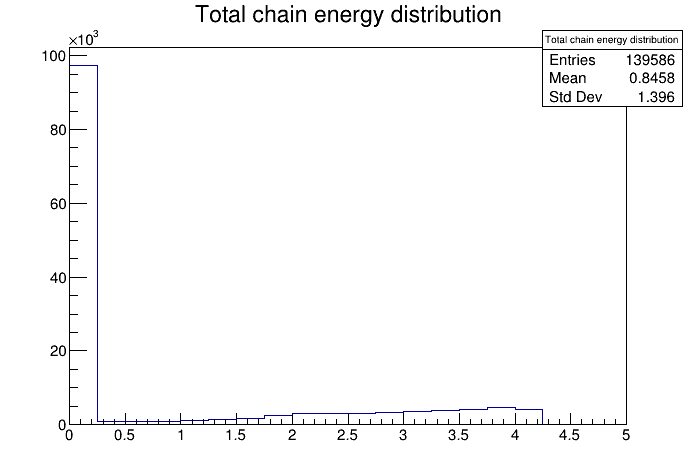

Info in <TCanvas::Print>: pdf file ../plots/pdf/ComptonEdgeTotalEnergyWithSpike.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/ComptonEdgeTotalEnergyWithSpike.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/ComptonEdgeTotalEnergyWithSpike.png has been created


In [9]:
TCanvas c;
auto hist = dfedist.Histo1D(
    {"Total chain energy distribution", "Total chain energy distribution", 20u, 0., 5.},
    "CETotalEnergy"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"ComptonEdgeTotalEnergyWithSpike"};
savePlot(hist, dir, file);

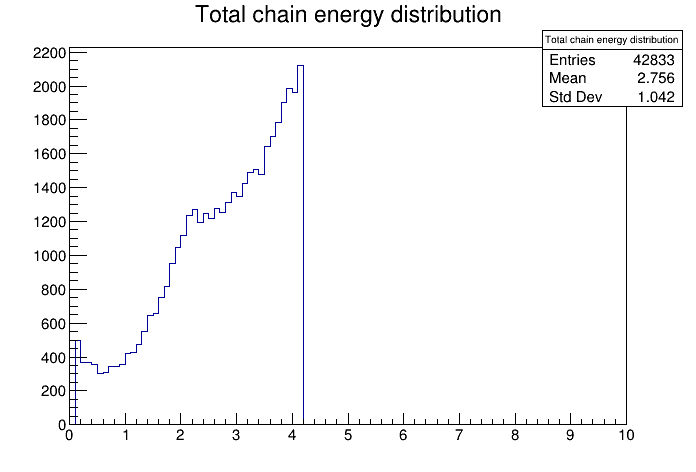

Info in <TCanvas::Print>: pdf file ../plots/pdf/ComptonEdgeTotalEnergy.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/ComptonEdgeTotalEnergy.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/ComptonEdgeTotalEnergy.png has been created


In [10]:
TCanvas c;
auto hist = dfedist.Filter("CETotalEnergy").Histo1D(
    {"Total chain energy distribution", "Total chain energy distribution", 100u, 0., 10.},
    "CETotalEnergy"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"ComptonEdgeTotalEnergy"};
savePlot(hist, dir, file);

# Number of cube

In [11]:
ROOT::RDF::RNode dfcount = df.Define("CubeCounter", "volidCECut.size()");

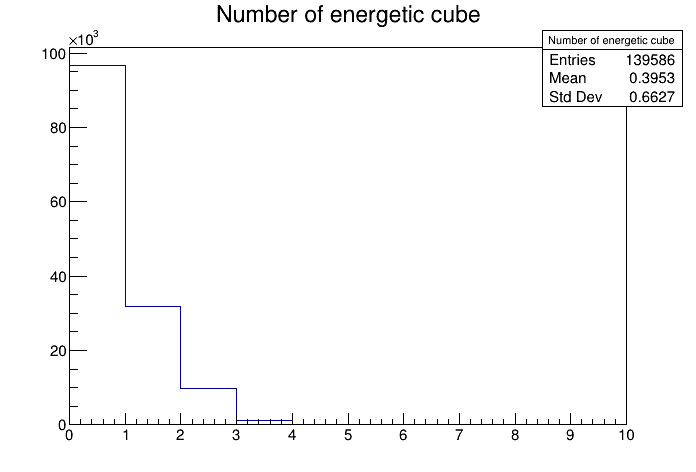

Info in <TCanvas::Print>: pdf file ../plots/pdf/ComptonEdgeNumberCube.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/ComptonEdgeNumberCube.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/ComptonEdgeNumberCube.png has been created


In [12]:
TCanvas c;
auto hist = dfcount.Histo1D(
    {"Number of energetic cube", "Number of energetic cube", 10u, 0., 10.},
    "CubeCounter"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"ComptonEdgeNumberCube"};
savePlot(hist, dir, file);

# Distance distribution

In [13]:
ROOT::RDF::RNode dfdistance = df.Define("__indexMaxCEMostEnergetic", "indexMax<double>(edep_pvtCECut)");
dfdistance = dfdistance.Filter("__indexMaxCEMostEnergetic !=-1").Define("CEMostEnergetic", "volidCECut[__indexMaxCEMostEnergetic]");

In [14]:
dfdistance = dfdistance.Define("CEChainDistFromMaxE", "euclidDist(CEMostEnergetic, volidCECut)");

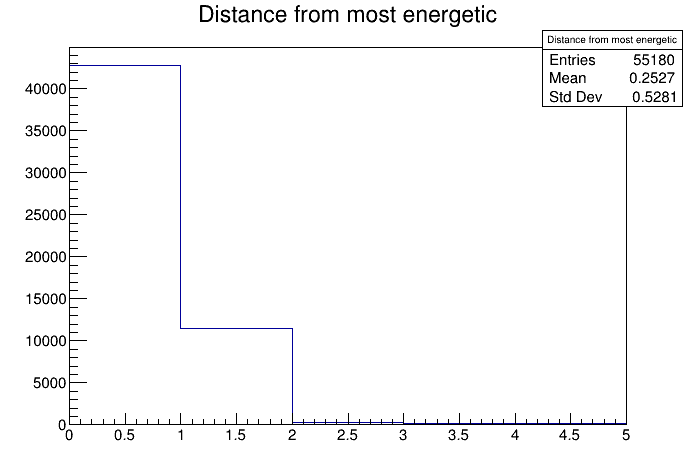

Info in <TCanvas::Print>: pdf file ../plots/pdf/CEChainDistFromMaxE.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/CEChainDistFromMaxE.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/CEChainDistFromMaxE.png has been created


In [15]:
TCanvas c;
auto hist = dfdistance.Histo1D<ROOT::RVec<double>>(
    {"Distance from most energetic", "Distance from most energetic", 5u, 0., 5.},
    "CEChainDistFromMaxE"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"CEChainDistFromMaxE"};
savePlot(hist, dir, file);

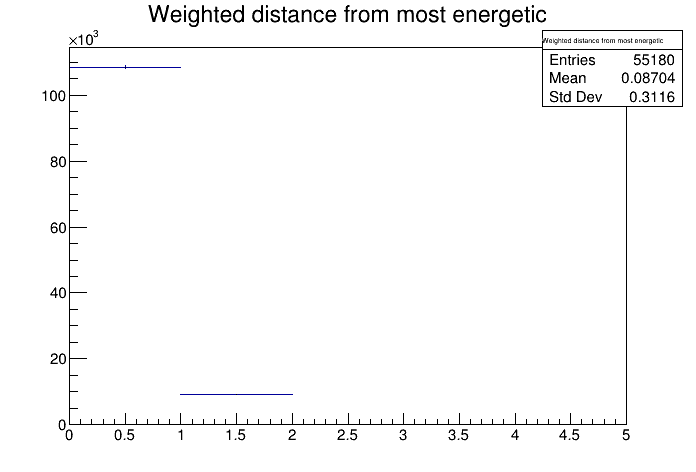

Info in <TCanvas::Print>: pdf file ../plots/pdf/CEChainWDistFromMaxE.pdf has been created
Info in <TCanvas::Print>: ps file ../plots/pgf/CEChainWDistFromMaxE.pgf has been created
Info in <TCanvas::Print>: png file ../plots/png/CEChainWDistFromMaxE.png has been created


In [16]:
TCanvas c;
auto hist = dfdistance.Histo1D<ROOT::RVec<double>, ROOT::RVec<double>>(
    {"Weighted distance from most energetic", "Weighted distance from most energetic", 5u, 0., 5.0},
    "CEChainDistFromMaxE", "edep_pvtCECut"
)->DrawClone();
c.Draw();
std::string dir {"../plots"};
std::string file {"CEChainWDistFromMaxE"};
savePlot(hist, dir, file);